<h1>GOAL TO PREDICT THE ROAD INCIDENTS </h1>

In [2]:
import pandas as pd 
import  numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [3]:
data_path = '../data/train.csv'
df = pd.read_csv(data_path)

In [27]:
# Working on test csv 
d_path = '../data/test.csv'
test_df = pd.read_csv(d_path)
test_df.head()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      172585 non-null  int64  
 1   road_type               172585 non-null  object 
 2   num_lanes               172585 non-null  int64  
 3   curvature               172585 non-null  float64
 4   speed_limit             172585 non-null  int64  
 5   lighting                172585 non-null  object 
 6   weather                 172585 non-null  object 
 7   road_signs_present      172585 non-null  bool   
 8   public_road             172585 non-null  bool   
 9   time_of_day             172585 non-null  object 
 10  holiday                 172585 non-null  bool   
 11  school_season           172585 non-null  bool   
 12  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


In [4]:
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [6]:
df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849975,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [7]:
#Values for true false 
df['school_season'].value_counts()
df['holiday'].value_counts()
df['public_road'].value_counts()
df['road_signs_present'].value_counts()

#Other categorical columns
df['time_of_day'].value_counts()
df['weather'].value_counts()
df['lighting'].value_counts()
df['road_type'].value_counts()

road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64

In [8]:
s = (df.dtypes == 'object')
b = (df.dtypes == 'bool')

bool_cols = list(b[b].index)
object_cols = list(s[s].index)

print("categorical variables:",object_cols)
print("bool variables:",bool_cols)

categorical variables: ['road_type', 'lighting', 'weather', 'time_of_day']
bool variables: ['road_signs_present', 'public_road', 'holiday', 'school_season']


In [28]:
#Seperating in test 
ss = (test_df.dtypes == 'object')
bb = (test_df.dtypes == 'bool')

bul_cols = list(b[b].index)
cat_cols = list(s[s].index)

print("categorical variables:",cat_cols)
print("bool variables:",bul_cols)

categorical variables: ['road_type', 'lighting', 'weather', 'time_of_day']
bool variables: ['road_signs_present', 'public_road', 'holiday', 'school_season']


In [9]:
#Other categorical columns
print("time of day:",df['time_of_day'].unique())
print("Weather :",df['weather'].unique())
print("Lighting : ",df['lighting'].unique())
print("road type :",df['road_type'].unique())


time of day: ['afternoon' 'evening' 'morning']
Weather : ['rainy' 'clear' 'foggy']
Lighting :  ['daylight' 'dim' 'night']
road type : ['urban' 'rural' 'highway']


<h2>Converting the Bool_cols into Binary_cols</h2>

In [10]:
for i in bool_cols:
    df[i] = df[i].astype(int)

In [ ]:
#For testing 
for i in bul_cols:
    test_df[i] = test_df[i].astype(int)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'num_lanes'}>,
        <Axes: title={'center': 'curvature'}>],
       [<Axes: title={'center': 'speed_limit'}>,
        <Axes: title={'center': 'road_signs_present'}>,
        <Axes: title={'center': 'public_road'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'school_season'}>,
        <Axes: title={'center': 'num_reported_accidents'}>],
       [<Axes: title={'center': 'accident_risk'}>, <Axes: >, <Axes: >]],
      dtype=object)

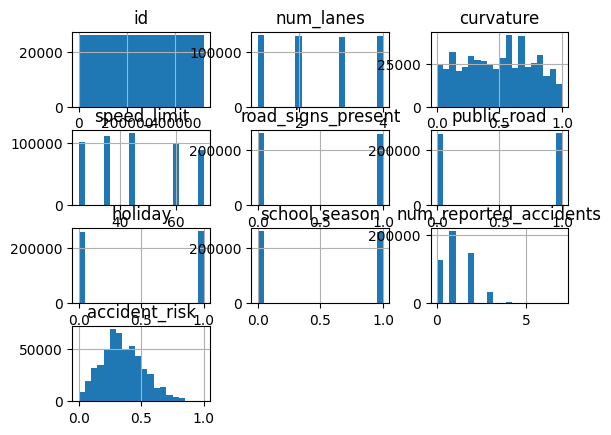

In [12]:
df.hist(bins=20)

<h2>Train Test Spliting the Data</h2>

In [13]:
X = df.drop( 'accident_risk', axis=1)
y = df['accident_risk']
X_train, X_valid , y_train, y_valid  =  train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)


In [14]:
print(X_train.shape)
print(X_valid.shape)

(414203, 13)
(103551, 13)


In [15]:
num_cols = X_train.drop(columns=object_cols,axis=1).columns
cat_cols = object_cols.copy()
print(num_cols)

Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'road_signs_present',
       'public_road', 'holiday', 'school_season', 'num_reported_accidents'],
      dtype='object')


In [31]:
#Seperating the numerical and categorical from test 
num_cols = test_df.drop(columns=object_cols,axis=1).columns
cat_cols 
print(num_cols)

Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'road_signs_present',
       'public_road', 'holiday', 'school_season', 'num_reported_accidents'],
      dtype='object')


In [16]:
# Building the Pipeline 
def buildpipeline(num_cols,cat_cols):
    num_pipe = Pipeline(steps=[
        ('imputer' , SimpleImputer(strategy='most_frequent'))
    ])

    cat_pipe = Pipeline(steps=[
        ('import' , SimpleImputer(strategy='most_frequent')),
        ('onehot' , OneHotEncoder(handle_unknown='ignore'))
    ])

    fullpipeline = ColumnTransformer(transformers=[
        ('num' , num_pipe , num_cols),
        ('cat' , cat_pipe , cat_cols)
    ])

    return fullpipeline

preprocessor  = buildpipeline(num_cols,cat_cols)

In [32]:
preprocessor.fit_transform(X_train)
preprocessor.transform(X_valid)
preprocessor.transform(test_df)

array([[5.17754e+05, 2.00000e+00, 3.40000e-01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.17755e+05, 3.00000e+00, 4.00000e-02, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.17756e+05, 2.00000e+00, 5.90000e-01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [6.90336e+05, 2.00000e+00, 1.40000e-01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [6.90337e+05, 1.00000e+00, 9.00000e-02, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [6.90338e+05, 1.00000e+00, 6.30000e-01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]], shape=(172585, 21))

<h2>Cross Validation</h2>

In [18]:
models = {
    # "Linear Regression" : LinearRegression(),
    # "RandomForest"     : RandomForestRegressor( n_estimators=100,
    # max_depth=15,max_features='sqrt',n_jobs=-1,random_state=42),
    "XGboost"  : XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

for name, clf in models.items():
    pipe = Pipeline([
        ('preproc', preprocessor),
        ('clf', clf)
    ])
    scores = cross_validate(pipe, X_train, y_train, cv=5, scoring= 'neg_root_mean_squared_error',return_train_score=False)
    mean_rmsle = -scores['test_score'].mean()
    print(f"{name}: RMSLE = {mean_rmsle:.4f}")

XGboost: RMSLE = 0.0561


In [22]:
# XGBoost
best_models = {}
xgb_pipe = Pipeline([
    ('preproc', preprocessor),
    ('clf', XGBRegressor(random_state=42, verbosity=0))
])

xgb_param_grid = {
    'clf__n_estimators': [100, 150],
    'clf__learning_rate': [0.05, 0.1],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_log_error',
    n_jobs=1
)
xgb_grid.fit(X_train, y_train)
best_models['XGBoost'] = xgb_grid.best_estimator_
print("Best params XGBoost:", xgb_grid.best_params_)

KeyboardInterrupt: 

Final XGBoost Test RMSLE: 0.0420


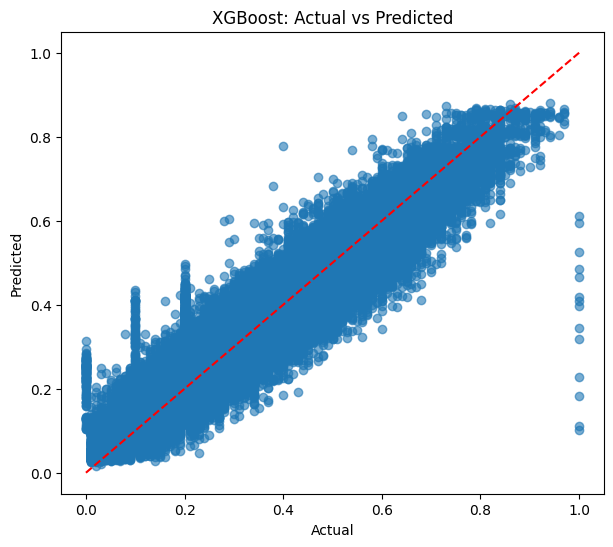

In [23]:
from sklearn.metrics import mean_squared_log_error

# ✅ Final tuned XGBoost pipeline
final_xgb = Pipeline([
    ('preproc', preprocessor),
    ('clf', XGBRegressor(
        colsample_bytree=1.0,
        learning_rate=0.1,
        n_estimators=150,
        subsample=0.8,
        random_state=42,
        verbosity=0
    ))
])

# ✅ Train on full training data
final_xgb.fit(X_train, y_train)

# ✅ Predict on test data
y_pred = final_xgb.predict(X_valid)

# ✅ Evaluate using RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_pred))
print(f"Final XGBoost Test RMSLE: {rmsle:.4f}")

# ✅ Plot Actual vs Predicted
plt.figure(figsize=(7, 6))
plt.scatter(y_valid, y_pred, alpha=0.6)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost: Actual vs Predicted")
plt.show()


In [ ]:
# GET FEATURES NAME AFTER PREPROCESSING 
# Extract the preprocessing step
preprocessor_fit = final_xgb.named_steps['preproc']

# Get numeric feature names
num_features = num_cols

# Get categorical feature names after one-hot encoding
cat_features = preprocessor_fit.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_cols)

# Combine numeric + categorical
feature_names = np.concatenate([num_features, cat_features])


In [ ]:
#Get Feature importances from XGBoost 
# Extract XGBoost model from pipeline
xgb_model = final_xgb.named_steps['clf']

# Get feature importances
importances = xgb_model.feature_importances_


In [ ]:
#Create a DataFrame and sort
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


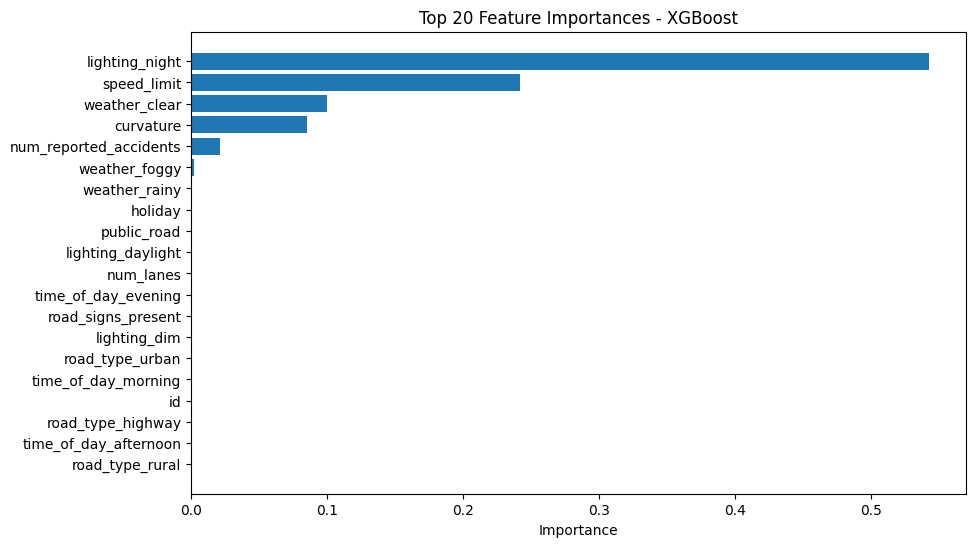

In [ ]:
#Plot top 20 features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'][:20][::-1], feat_df['Importance'][:20][::-1])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances - XGBoost')
plt.show()


In [ ]:
# If you want, I can also show a more advanced version using SHAP values, which gives a per-prediction feature contribution — it’s much more interpretable than raw feature importances.

# Do you want me to do that?
import joblib

# Save
joblib.dump(final_xgb, 'xgb_pipeline.pkl')

# Load later
final_xgb = joblib.load('xgb_pipeline.pkl')

In [34]:
# ✅ Final tuned XGBoost pipeline
final_xgb = Pipeline([
    ('preproc', preprocessor),
    ('clf', XGBRegressor(
        colsample_bytree=1.0,
        learning_rate=0.1,
        n_estimators=150,
        subsample=0.8,
        random_state=42,
        verbosity=0
    ))
])

# ✅ Train the model on full training data
final_xgb.fit(X_train, y_train)

# ✅ Predict on the real test data (no labels)
y_pred = final_xgb.predict(test_df)

# ✅ Ensure no negative values (important for RMSLE-based evaluations)
y_pred = np.maximum(0, y_pred)

# ✅ Prepare the submission file
submission = pd.DataFrame({
    "id": test_df["id"],     # use the 'id' column from your test data
    "accident_risk": y_pred  # this should match the target column name
})

# ✅ Save the submission
submission.to_csv("submission.csv", index=False)

print("✅ Submission file created: submission.csv")
print(submission.head())


✅ Submission file created: submission.csv
       id  accident_risk
0  517754       0.290108
1  517755       0.128435
2  517756       0.187994
3  517757       0.322994
4  517758       0.402890


In [24]:
#Submission file
submission = pd.DataFrame({
    'id': X_valid['id'],
    'y': y_pred
})
submission.to_csv('sample.csv', index=False)

print("\n Submission file 'submission.csv' created using LightGBM pipeline with cross-validation!")


 Submission file 'submission.csv' created using LightGBM pipeline with cross-validation!


In [ ]:
# Changing the bool cols 
for i in bul_cols:
    test_df[i] = test_df[i].astype(int)

#Builing the Pipeline 
preprocessor.transform(test_df)



# ✅ Predict on the real test data (no labels)
y_pred = final_xgb.predict(test_df)

# ✅ Ensure no negative values (important for RMSLE-based evaluations)
y_pred = np.maximum(0, y_pred)

# ✅ Prepare the submission file
submission = pd.DataFrame({
    "id": test_df["id"],     # use the 'id' column from your test data
    "accident_risk": y_pred  # this should match the target column name
})

# ✅ Save the submission
submission.to_csv("submission.csv", index=False)

print("✅ Submission file created: submission.csv")
print(submission.head())
